In [28]:
import os
import sys
import glob
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import math
import config
os.chdir(config.LOOP_CATALOG_DIR)
sns.set_theme(style="whitegrid")
os.chdir('/mnt/bioadhoc-temp/Groups/vd-ay/kfetter/hichip-db-loop-calling')
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('max_colwidth', 400)

## Sequencing Depth

In [29]:
def read_hicpro_stats_log(log):
    log_data = {}
    with open(log) as fr:
        for line in fr:
            if line.startswith('#'):
                continue
            else:
                info = line.strip().split()
                log_data[info[0]] = int(info[1])
    return(log_data)

In [30]:
mpairstat_data = []
tpl = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}.mpairstat'
glob_str = tpl.format(std_sample_name='*')
for fn in glob.glob(glob_str):
    std_sample_name = fn.split('/')[2]
    if "Homo_Sapiens" in std_sample_name:
        ac = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}.mpairstat'.format(std_sample_name = std_sample_name)
        mpairstat = read_hicpro_stats_log(ac)
        mpairstat['std_sample_name'] = std_sample_name
        mpairstat_data.append(mpairstat)
mpairstat_df = pd.DataFrame.from_dict(mpairstat_data)

In [31]:
mergestat_data = []
tpl = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}_allValidPairs.mergestat'
glob_str = tpl.format(std_sample_name='*')
for fn in glob.glob(glob_str):
    std_sample_name = fn.split('/')[2]
    if "Homo_Sapiens" in std_sample_name:
        ac = 'results/hicpro/{std_sample_name}/hic_results/stats/{std_sample_name}/{std_sample_name}_allValidPairs.mergestat'.format(std_sample_name = std_sample_name)
        mergestat = read_hicpro_stats_log(ac)
        mergestat['std_sample_name'] = std_sample_name
        mergestat_data.append(mergestat)
mergestat_df = pd.DataFrame.from_dict(mergestat_data)

In [32]:
all_stats = mpairstat_df.merge(mergestat_df, on='std_sample_name')
# move the std_sample_name to the beginning
tmp = all_stats.pop('std_sample_name')
all_stats.insert(0, 'std_sample_name', tmp)
all_stats = all_stats.sort_values(by = "std_sample_name").reset_index(drop=True)

In [33]:
all_stats

,std_sample_name,Total_pairs_processed,Unmapped_pairs,Low_qual_pairs,Unique_paired_alignments,Multiple_pairs_alignments,Pairs_with_singleton,Low_qual_singleton,Unique_singleton_alignments,Multiple_singleton_alignments,Reported_pairs,valid_interaction,valid_interaction_rmdup,trans_interaction,cis_interaction,cis_shortRange,cis_longRange
0,293T-PDS.GSE128106.Homo_Sapiens.YY1.b1,45904302,3362149,15542162,20017317,0,6982674,0,0,0,20017317,14233750,3014685,2482984,531701,78720,452981
1,293T-TMPYP4.GSE128106.Homo_Sapiens.YY1.b1,92276625,6198972,30310709,41112515,0,14654429,0,0,0,41112515,23170231,4869234,4105502,763732,150624,613108
2,293T.GSE128106.Homo_Sapiens.YY1.b1,247695887,59323085,52826289,85415584,0,50130929,0,0,0,85415584,24584547,1110646,224404,886242,170863,715379
3,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,165894611,12380141,51858728,93044245,0,8611497,0,0,0,93044245,75756233,53512756,17600450,35912306,5529757,30382549
4,A673-siCT-Dh1-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,78716891,10278126,23363051,41157536,0,3918178,0,0,0,41157536,31654215,25675978,8126918,17549060,2770630,14778430
5,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,169061715,13732671,48414040,97642042,0,9272962,0,0,0,97642042,71886126,51460797,15948179,35512618,5209144,30303474
6,A673-siSA2-Dh6-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,103397011,10877734,24392655,62334394,0,5792228,0,0,0,62334394,38727933,30643463,9218577,21424886,3301441,18123445
7,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b1,140903561,21766765,35730662,76480206,0,6925928,0,0,0,76480206,53019332,43442814,14055397,29387417,3985206,25402211
8,A673-siSA2-Dh8-72h-D347-D362.GSE156650.Homo_Sapiens.CTCF.b2,113738451,12078886,25410113,69499616,0,6749836,0,0,0,69499616,41040755,32594833,10159780,22435053,3218164,19216889
9,A673_SA1m1.GSE133227.Homo_Sapiens.CTCF.b1,278154964,3657012,103698606,160859544,0,9939802,0,0,0,160859544,100153514,42076548,11245486,30831062,8009926,22821136


In [35]:
subset = all_stats[["std_sample_name", "valid_interaction", "cis_interaction", "cis_shortRange", "cis_longRange"]]

In [42]:
subset.describe()

,valid_interaction,cis_interaction,cis_shortRange,cis_longRange
count,4.860000e+02,4.860000e+02,4.860000e+02,4.860000e+02
mean,7.925346e+07,3.920146e+07,1.175293e+07,2.744853e+07
std,8.124884e+07,4.419939e+07,1.307457e+07,3.416030e+07
min,1.658719e+06,7.185500e+04,1.042500e+04,6.143000e+04
25%,2.376500e+07,9.125314e+06,2.433748e+06,6.404747e+06
50%,5.483546e+07,2.620456e+07,6.602776e+06,1.766977e+07
75%,1.072029e+08,5.517792e+07,1.719113e+07,3.519388e+07
max,4.501581e+08,2.726536e+08,7.917164e+07,2.352802e+08


<AxesSubplot:xlabel='valid_interaction', ylabel='Count'>

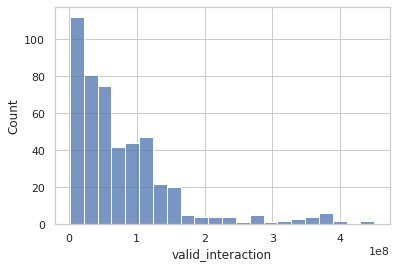

In [38]:
sns.histplot(subset["valid_interaction"])

<AxesSubplot:xlabel='cis_interaction', ylabel='Count'>

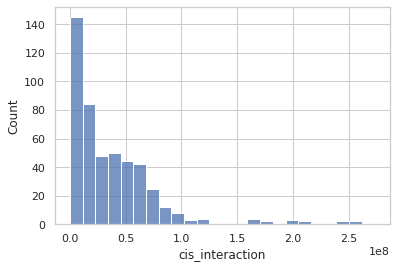

In [39]:
sns.histplot(subset["cis_interaction"])

<AxesSubplot:xlabel='cis_interaction', ylabel='valid_interaction'>

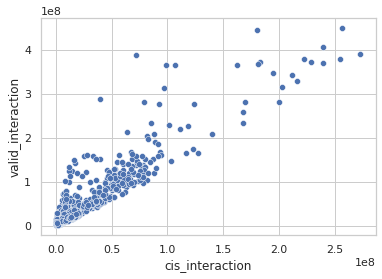

In [40]:
sns.scatterplot(x=subset["cis_interaction"], y=subset["valid_interaction"])